# Dependancies

In [3]:
import cv2
import numpy as np
import pandas as pd

## DIGIT EXTRACTION

In [4]:
def ROI(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BAYER_BG2GRAY)
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
    _, cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return cnts

# Sort Contours from right to left

In [5]:
def sortContours(cnts):
    boundingBoxes = [cv2.boundingRect(cnt) for cnt in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key = lambda x:x[1][0], reverse=True))
    return (cnts, boundingBoxes)

### Load the source image to build our digits data set.

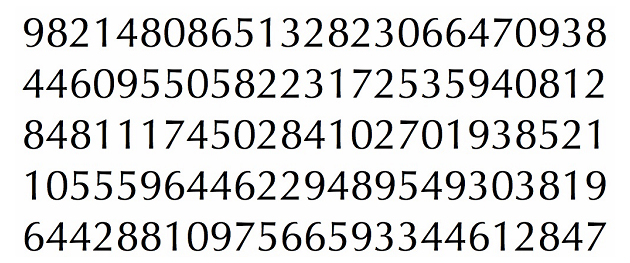

In [6]:
from IPython.display import Image
Image(filename='images/final.jpg') 

In [11]:
image1 = cv2.imread('images/final.jpg', 0)
image1_colored = cv2.imread('images/final.jpg')

# Extract all the digits from the image

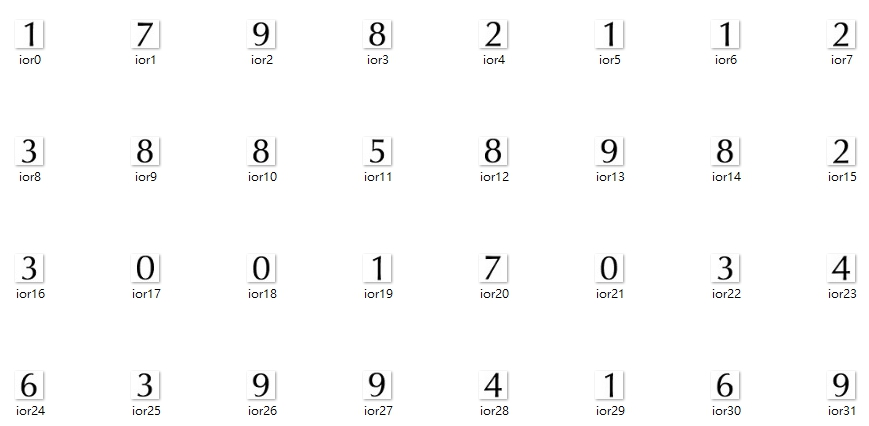

In [12]:
from IPython.display import Image
Image(filename='images/extraction.jpg')

In [15]:
def ROI_EXtraction(cnt, sourceImg, sizeLimit=250, resize=28, padding=2):
    x, y, w, h = cv2.boundingRect(cnt)
    if (w*h > sizeLimit):
        #_multiplier = resize / (h + padding)
        _length = h + padding
        _widthOffset = int((_length - w + padding) / 2)
        #print(y-padding,y+padding,x-_widthOffset,x+_widthOffset)
        roi = sourceImg.copy()
        roi = roi[y-padding:y+h+padding,x-_widthOffset:x+_widthOffset+w]
        roi[0:-1,0:_widthOffset] = 255
        roi[0:-1,w + _widthOffset:] = 255
        return roi

# Label the digits one by one

In [16]:
path = 'digits_dataset/'
size = 28
labels = []
counter = 0

cnts = ROI(image1)[1:-1]
(sorted_cnts, boundingBoxes) = sortContours(cnts)
for roi in sorted_cnts:
    output = ROI_EXtraction(roi, image1)
    output = cv2.resize(output, (size, size))
    cv2.imshow('canvas', output)
    label = int(chr(cv2.waitKey()))
    
    labels.append(label)
    full_path = path + 'ior{}.jpg'.format(counter)
    cv2.imwrite(full_path, output)
    counter += 1

ValueError: chr() arg not in range(0x110000)

## 儲存監督學習之label

In [17]:
import csv
def labels_CSV(labels, path='labels/labels2.csv'):
    hs = open(path,"a")
    hs.write("class\n")
    for label in labels:
        hs.write(str(label) + "\n")
    hs.close() 

## 將圖片全部統一尺寸為28X28

In [ ]:
import os
import cv2


ior_folder = 'ior/'
files = os.listdir(ior_folder)
files = sorted(files, key = lambda x:int(x[3:].split('.')[0]), reverse=True)

_size = 28
for file in files:
    fullPath = ior_folder + file
    image = cv2.imread(fullPath)
    image = cv2.resize(image, (_size, _size))
    cv2.imwrite(fullPath, image)